In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

In [2]:
dataset = pd.read_excel('Boston_Housing.xlsx')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check the Missing missing values

In [5]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

EDA and Correlation


In [6]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


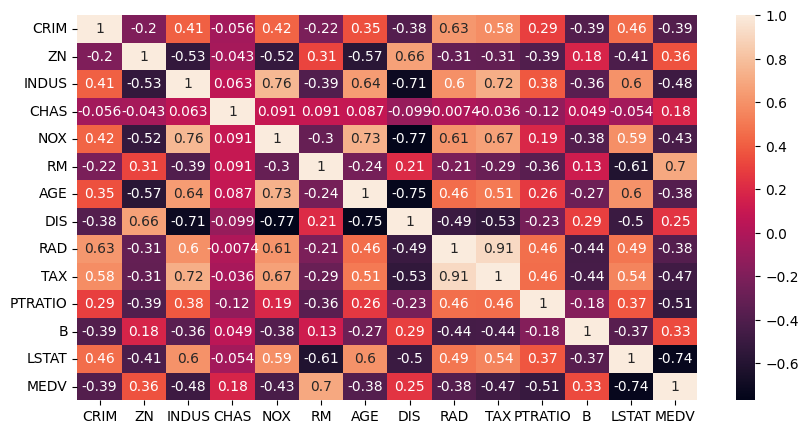

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

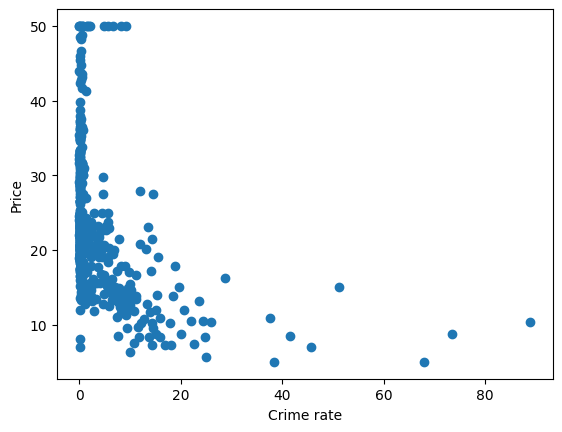

In [8]:
plt.scatter(dataset["CRIM"], dataset['MEDV'])
plt.xlabel("Crime rate")
plt.ylabel("Price")
plt.show()

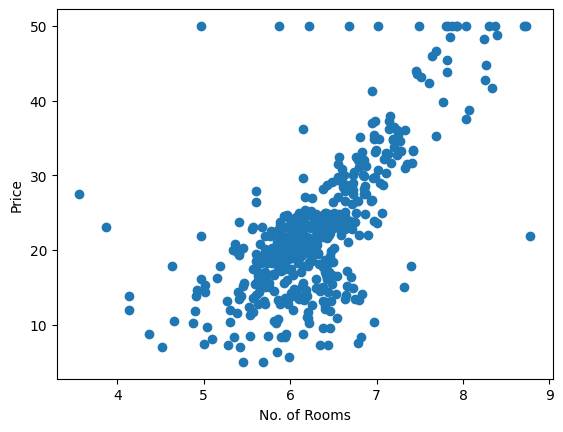

In [9]:
plt.scatter(dataset['RM'], dataset['MEDV'])
plt.xlabel("No. of Rooms")
plt.ylabel("Price")
plt.show()

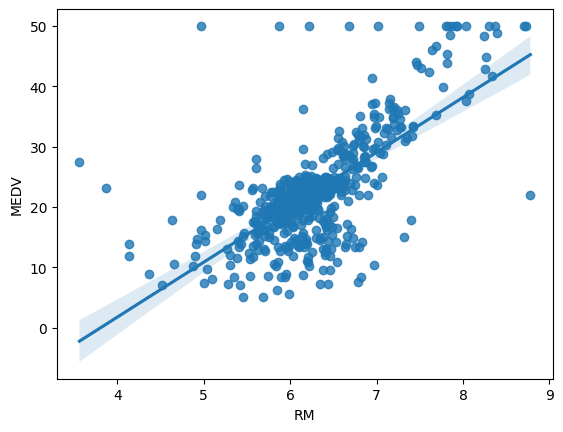

In [10]:
sns.regplot(x='RM', y = "MEDV", data=dataset)
plt.show()

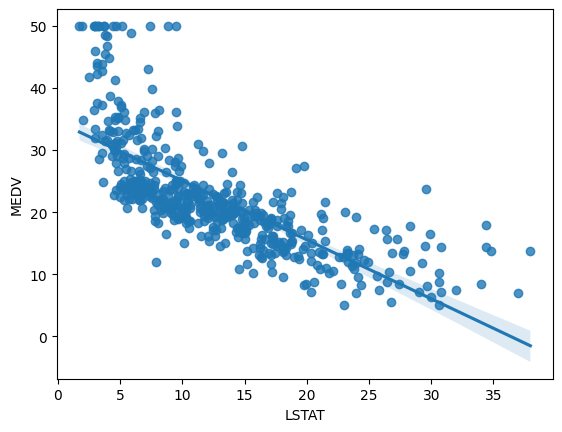

In [11]:
sns.regplot(x='LSTAT', y = "MEDV", data=dataset)
plt.show()

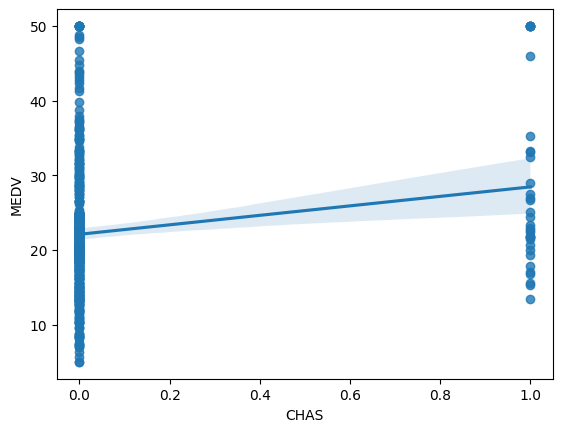

In [12]:
sns.regplot(x='CHAS', y = "MEDV", data=dataset)
plt.show()

Dependent and Independent features

In [13]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [14]:
x, y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       17.8  39

Train test split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=70)

In [16]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
152,1.12658,0.0,19.58,1,0.8710,5.012,88.0,1.6102,5,403,14.7,343.28,12.12
490,0.20746,0.0,27.74,0,0.6090,5.093,98.0,1.8226,4,711,20.1,318.43,29.68
38,0.17505,0.0,5.96,0,0.4990,5.966,30.2,3.8473,5,279,19.2,393.43,10.13
317,0.24522,0.0,9.90,0,0.5440,5.782,71.7,4.0317,4,304,18.4,396.90,15.94
121,0.07165,0.0,25.65,0,0.5810,6.004,84.1,2.1974,2,188,19.1,377.67,14.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.31827,0.0,9.90,0,0.5440,5.914,83.2,3.9986,4,304,18.4,390.70,18.33
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76
114,0.14231,0.0,10.01,0,0.5470,6.254,84.2,2.2565,6,432,17.8,388.74,10.45
214,0.28955,0.0,10.59,0,0.4890,5.412,9.8,3.5875,4,277,18.6,348.93,29.55


Standardize the dataset by standard scaling

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [18]:
x_test = scaler.transform(x_test)

In [19]:
x_train, x_test

(array([[-0.28779502, -0.50119824,  1.21034396, ..., -1.76357344,
         -0.16167559, -0.07462314],
        [-0.39576138, -0.50119824,  2.39301512, ...,  0.76397716,
         -0.43708969,  2.39819179],
        [-0.39956849, -0.50119824, -0.76367335, ...,  0.34271872,
          0.39414001, -0.35485672],
        ...,
        [-0.40341436, -0.50119824, -0.17668582, ..., -0.31257217,
          0.34216044, -0.30979404],
        [-0.38611851, -0.50119824, -0.09262341, ...,  0.06187977,
         -0.09905628,  2.37988507],
        [-0.41574019, -0.50119824, -0.87527345, ...,  0.81078365,
          0.34947526, -0.83083135]], shape=(354, 13)),
 array([[-0.40507652,  0.03900447, -0.74773048, ...,  0.20229925,
          0.43259823, -0.54355672],
        [-0.4108559 , -0.50119824,  0.23203142, ...,  0.10868626,
          0.41065377, -0.82660672],
        [ 1.88329296, -0.50119824,  0.99583988, ...,  0.81078365,
          0.43259823,  0.11126044],
        ...,
        [-0.30546325, -0.50119824,  1

# Model Training

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
regression.score(x_test, y_test), regression.score(x_train, y_train)

(0.7321093004374989, 0.7383842458341593)

printing coefficient and intercept

In [23]:
regression.coef_

array([-1.25740007,  1.08791713, -0.36438794,  0.70068447, -2.25635297,
        2.27701173,  0.19343432, -3.66072277,  2.73144175, -1.88658391,
       -1.79677287,  1.02747707, -3.87169766])

In [24]:
regression.intercept_

np.float64(22.390112994350275)

In [25]:
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

predict with test data

In [26]:
reg_pred = regression.predict(x_test)
reg_pred

array([20.85634258, 25.34513399, 24.87477622, 15.40517818, 17.25878521,
        1.37578564, 16.22029827, 27.98840501, 30.68773757, 25.68109167,
       17.46440735, 30.24362049, 12.325743  , 30.93000623, 28.80011896,
       21.17491684, 21.96172153, 14.70652855, 19.98901515, 16.46442828,
       27.1748453 , 39.73477785, 19.32089996, 21.34852917, 20.66179818,
       19.96306603, 28.32924465, 35.18517632, 14.9833051 , 17.75151951,
       22.59634217, 25.94871002, 33.50939696, 41.38942124, 20.33522751,
       18.67502072, 29.20213411, 14.03729142, 23.69956778, 37.6967535 ,
       30.38826344, 24.93527128, 36.84577969, 24.49555952, 19.30866144,
       25.26571974, 17.4330132 , 24.54448455, 13.53904998, 35.94603941,
       17.59153933, 38.94482611, 23.03954046, 19.80624891, 14.75383844,
       19.13836794, 23.078889  , 10.80082269, 30.26654672, 33.56729506,
       13.29004009, 20.82585906, 25.0924484 , 19.44142049, 12.30823236,
       23.07776074, 32.6586873 , 23.79001095, 13.71065903, 22.50

In [27]:
comparison_dict= {
    "Original": y_test,
    "Predict": reg_pred
}
pred_comparison = pd.DataFrame(comparison_dict)
pred_comparison

,Original,Predict
69,20.9,20.856343
74,24.1,25.345134
375,15.0,24.874776
378,13.1,15.405178
135,18.1,17.258785
...,...,...
62,22.2,23.926774
64,33.0,22.546091
134,15.6,13.145120
218,21.5,24.975305


plot a scatter plot for prediction

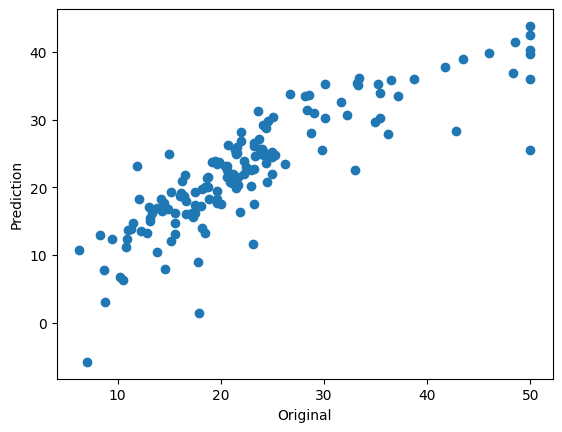

In [28]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Original")
plt.ylabel("Prediction")
plt.show()

Residual or error

In [29]:
residuals = y_test - reg_pred
residuals

69      0.043657
74     -1.245134
375    -9.874776
378    -2.305178
135     0.841215
         ...    
62     -1.726774
64     10.453909
134     2.454880
218    -3.475305
177    -5.184430
Name: MEDV, Length: 152, dtype: float64

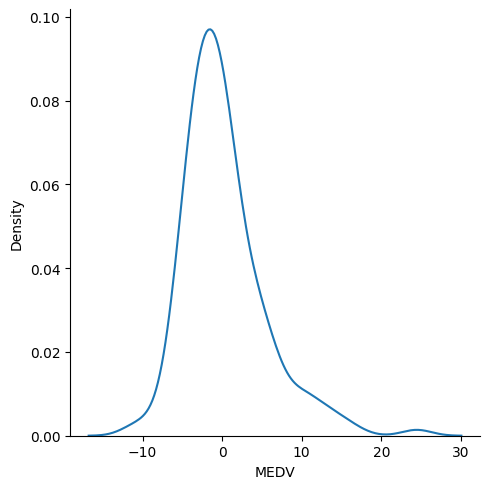

In [30]:
sns.displot(residuals, kind="kde")

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))
print(mean_absolute_error(y_test,reg_pred))

25.950898465649637
5.0942024366577385
3.654462851789334


R square and adjusted R square

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
score

0.7321093004374989

adjuststed R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

there is no such fuction for calculating R2 but to calculate manually